In [1]:
import pandas as pd
import numpy as np
import tushare as ts
import os
import matplotlib
import matplotlib.pyplot as plt
from pylab import *

import scipy.optimize as sco
import scipy.interpolate as sci
from scipy import stats

In [79]:
#新接口用法
ts.set_token('76917a1357caded48fb50c2b067a6608e6be3bd50111da5e84509a28')

df = ts.pro_bar(ts_code='603939.SH', adj='hfq', start_date='20180101 ', end_date='20200701')
df

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
0,603939.SH,20200701,265.1440,265.1440,239.2060,248.3131,262.2620,-13.9489,-5.3187,40560.39,350407.123
1,603939.SH,20200630,249.5812,264.8846,249.5812,262.2620,247.5062,14.7558,5.9618,28390.03,254303.658
2,603939.SH,20200629,242.6932,250.1288,242.6932,247.5062,243.5290,3.9772,1.6332,29992.20,257367.612
3,603939.SH,20200624,245.7193,250.3882,241.1081,243.5290,246.4686,-2.9396,-1.1927,21589.51,182836.422
4,603939.SH,20200623,241.9439,249.2930,241.0217,246.4686,241.9439,4.5247,1.8701,28016.52,239492.276
...,...,...,...,...,...,...,...,...,...,...,...
533,603939.SH,20180108,92.8014,93.4517,91.0539,92.2731,91.8464,0.4267,0.4646,10880.62,49393.150
534,603939.SH,20180105,92.0496,92.0496,90.6882,91.8464,91.9480,-0.1016,-0.1105,7481.91,33657.634
535,603939.SH,20180104,91.6026,94.3864,90.2818,91.9480,92.4154,-0.4674,-0.5058,9219.00,41877.108
536,603939.SH,20180103,92.5576,95.4837,91.8667,92.4154,92.3950,0.0204,0.0221,13006.00,59915.615


In [80]:
df.to_csv("E:\\pythonstudying\\risk_management\\data\\603939.csv", sep = ",")

导入数据

In [2]:
path = 'E:\\pythonstudying\\risk_management\\data'
files = os.listdir(path) 
files

['000568.csv',
 '000651.csv',
 '000661.csv',
 '002414.csv',
 '002465.csv',
 '002821.csv',
 '300122.csv',
 '300326.csv',
 '600519.csv',
 '600585.csv',
 '600763.csv',
 '600988.csv',
 '603658.csv',
 '603882.csv',
 '603939.csv']

In [3]:
data_list = []
for file in files: 
    data_list.append('stock_'+file[0:6])
    locals()['stock_'+file[0:6]] =  pd.read_csv(path + '/' + file, parse_dates=['trade_date'], index_col='trade_date')
    locals()['stock_'+file[0:6]].drop(['Unnamed: 0','ts_code'], axis=1, inplace=True)
    print('股票{0}数据读取完毕，其shape为：{1}'.format(file[0:6], locals()['stock_'+file[0:6]].shape))

股票000568数据读取完毕，其shape为：(605, 9)
股票000651数据读取完毕，其shape为：(599, 9)
股票000661数据读取完毕，其shape为：(596, 9)
股票002414数据读取完毕，其shape为：(605, 9)
股票002465数据读取完毕，其shape为：(605, 9)
股票002821数据读取完毕，其shape为：(605, 9)
股票300122数据读取完毕，其shape为：(605, 9)
股票300326数据读取完毕，其shape为：(595, 9)
股票600519数据读取完毕，其shape为：(605, 9)
股票600585数据读取完毕，其shape为：(605, 9)
股票600763数据读取完毕，其shape为：(605, 9)
股票600988数据读取完毕，其shape为：(599, 9)
股票603658数据读取完毕，其shape为：(605, 9)
股票603882数据读取完毕，其shape为：(605, 9)
股票603939数据读取完毕，其shape为：(538, 9)


In [4]:
stock_000568

,open,high,low,close,pre_close,change,pct_chg,vol,amount
trade_date,,,,,,,,,
2018-01-02,2069.8125,2078.8388,2026.2375,2047.4025,2054.2500,-6.8475,-0.3333,123059.89,808575.676
2018-01-03,2054.8725,2077.9050,2034.9525,2066.7000,2047.4025,19.2975,0.9425,108300.07,715993.452
2018-01-04,2054.8725,2142.0225,2054.8725,2139.8438,2066.7000,73.1438,3.5392,170436.69,1155914.380
2018-01-05,2140.1550,2145.7575,2102.1825,2118.0563,2139.8438,-21.7875,-1.0182,102799.09,700279.713
2018-01-08,2113.3875,2179.3725,2086.9313,2130.5062,2118.0563,12.4499,0.5878,108079.65,740472.952
...,...,...,...,...,...,...,...,...,...
2020-06-23,2923.1691,3025.7535,2899.5456,3018.6341,2925.7580,92.8761,3.1744,204117.74,1883997.774
2020-06-24,3017.9869,3048.4062,2961.0315,2992.0981,3018.6341,-26.5360,-0.8791,162711.70,1505023.473
2020-06-29,2952.9412,2962.6495,2906.0178,2940.9677,2992.0981,-51.1304,-1.7088,175228.54,1580141.213


In [5]:
data_list

['stock_000568',
 'stock_000651',
 'stock_000661',
 'stock_002414',
 'stock_002465',
 'stock_002821',
 'stock_300122',
 'stock_300326',
 'stock_600519',
 'stock_600585',
 'stock_600763',
 'stock_600988',
 'stock_603658',
 'stock_603882',
 'stock_603939']

In [6]:
stock_returns = stock_000568.copy()
for data in data_list:    
    stock_returns[data] = locals()[data]['close'].pct_change()
stock_returns.drop(['open', 'close', 'high', 'low', 'vol','pre_close','change','pct_chg','amount'], axis=1, inplace=True)
stock_returns.dropna(axis=0, how='all', inplace=True)
stock_returns

,stock_000568,stock_000651,stock_000661,stock_002414,stock_002465,stock_002821,stock_300122,stock_300326,stock_600519,stock_600585,stock_600763,stock_600988,stock_603658,stock_603882,stock_603939
trade_date,,,,,,,,,,,,,,,
2018-01-03,0.009425,0.011074,0.012200,0.010602,0.020306,-0.003273,0.024050,0.012107,0.017063,-0.008761,0.015899,0.006230,0.000193,-0.001234,0.000221
2018-01-04,0.035392,0.020372,-0.013759,0.003497,0.030845,0.004926,0.008509,0.038278,0.029629,0.013258,-0.016876,-0.023220,0.004061,-0.021618,-0.005058
2018-01-05,-0.010182,0.027909,-0.018415,0.001741,-0.007721,-0.000164,0.013837,0.010368,0.001750,0.017134,0.060861,0.014262,-0.016952,0.033775,-0.001105
2018-01-08,0.005878,-0.001044,0.000569,-0.013332,0.005836,-0.004575,-0.003662,0.001141,0.018649,0.040429,0.013827,-0.009376,0.003136,-0.010992,0.004646
2018-01-09,0.027027,0.032825,0.022443,-0.005875,-0.026112,0.001477,0.087872,-0.001139,0.040405,-0.017369,-0.003481,-0.022081,-0.006447,0.048472,-0.005285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-23,0.031744,-0.017988,0.059753,0.004153,-0.024465,0.045089,0.048783,0.020423,0.024670,-0.012209,0.047895,0.021927,0.014062,0.052599,0.018701
2020-06-24,-0.008791,0.017606,-0.014816,0.003383,0.000000,-0.020041,-0.029909,-0.016503,0.001672,0.013109,-0.006421,0.079291,-0.030171,0.003486,-0.011927
2020-06-29,-0.017088,-0.013282,0.015326,0.036343,0.015674,0.028615,-0.012212,0.000000,0.002164,-0.024769,0.012348,0.026792,0.007478,0.042270,0.016332


In [7]:
stock_returns.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 604 entries, 2018-01-03 to 2020-07-01
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   stock_000568  604 non-null    float64
 1   stock_000651  598 non-null    float64
 2   stock_000661  595 non-null    float64
 3   stock_002414  604 non-null    float64
 4   stock_002465  604 non-null    float64
 5   stock_002821  604 non-null    float64
 6   stock_300122  604 non-null    float64
 7   stock_300326  594 non-null    float64
 8   stock_600519  604 non-null    float64
 9   stock_600585  604 non-null    float64
 10  stock_600763  604 non-null    float64
 11  stock_600988  598 non-null    float64
 12  stock_603658  604 non-null    float64
 13  stock_603882  604 non-null    float64
 14  stock_603939  537 non-null    float64
dtypes: float64(15)
memory usage: 75.5 KB


## 根据历史数据计算投资组合中单个资产的收益率和资产之间的协方差矩阵

单个资产收益率

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029213388208>,
      dtype=object)

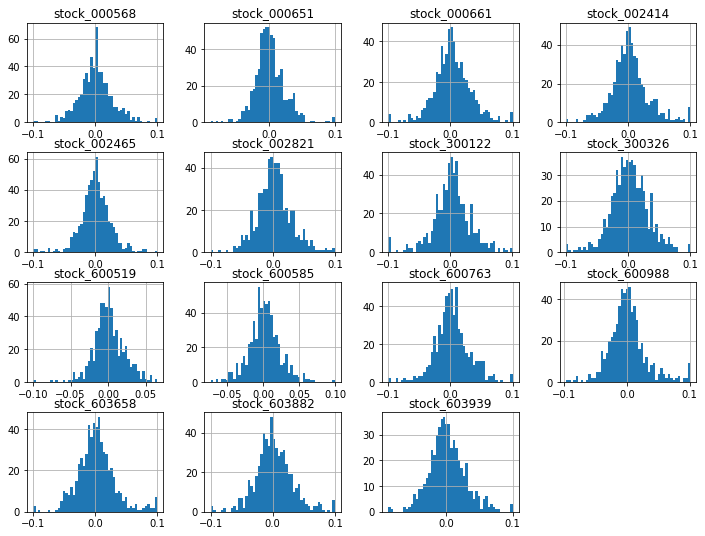

In [8]:
stock_returns.hist(bins=50, figsize=(12, 9)) #收益率都近似正态分布

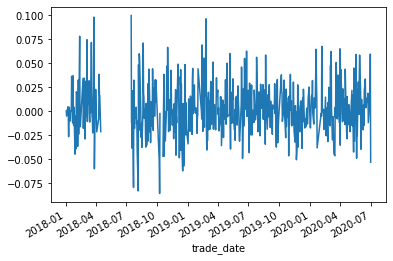

In [9]:
stock_returns[data_list[-1]].plot()

年化协方差矩阵

In [10]:
#以一年252个交易日计算
cov_mat_annual = stock_returns.cov() * 252
cov_mat_annual

,stock_000568,stock_000651,stock_000661,stock_002414,stock_002465,stock_002821,stock_300122,stock_300326,stock_600519,stock_600585,stock_600763,stock_600988,stock_603658,stock_603882,stock_603939
stock_000568,0.179281,0.092402,0.084598,0.039734,0.050770,0.076096,0.074454,0.063261,0.106507,0.070757,0.086844,0.010937,0.078243,0.060781,0.062206
stock_000651,0.092402,0.129393,0.060319,0.033020,0.040796,0.055538,0.052598,0.044814,0.071758,0.063221,0.062736,0.011706,0.050512,0.042908,0.041288
stock_000661,0.084598,0.060319,0.208761,0.048236,0.046033,0.105693,0.118460,0.093181,0.065843,0.040961,0.116374,0.015464,0.111106,0.074060,0.083489
stock_002414,0.039734,0.033020,0.048236,0.231864,0.084857,0.075219,0.059017,0.077032,0.033798,0.028206,0.049963,0.043027,0.063176,0.071063,0.043395
stock_002465,0.050770,0.040796,0.046033,0.084857,0.153787,0.065091,0.058436,0.057756,0.038180,0.039773,0.055130,0.034106,0.054482,0.056781,0.040493
stock_002821,0.076096,0.055538,0.105693,0.075219,0.065091,0.190399,0.114014,0.113177,0.061081,0.046181,0.114577,0.018771,0.122427,0.093624,0.092742
stock_300122,0.074454,0.052598,0.118460,0.059017,0.058436,0.114014,0.227803,0.100850,0.057359,0.041082,0.106216,0.019742,0.108270,0.087719,0.090360
stock_300326,0.063261,0.044814,0.093181,0.077032,0.057756,0.113177,0.100850,0.224484,0.049563,0.041734,0.092223,0.020274,0.098919,0.095995,0.071462
stock_600519,0.106507,0.071758,0.065843,0.033798,0.038180,0.061081,0.057359,0.049563,0.106069,0.053608,0.064626,0.007241,0.059906,0.049220,0.053302
stock_600585,0.070757,0.063221,0.040961,0.028206,0.039773,0.046181,0.041082,0.041734,0.053608,0.119616,0.047607,0.008972,0.038785,0.033893,0.028035


## 利用蒙特卡罗模拟随机生成投资组合中的权重，模拟出各种可能权重下组合的收益率和标准差

In [11]:
number, length = 10000, stock_returns.shape[1]
random_p = np.empty((number, length + 2))
np.random.seed(111)

for i in range(number):
    random_len = np.random.random(length)
    random_weight = random_len / np.sum(random_len)
    
    mean_return = stock_returns.mul(random_weight, axis=1).sum(axis=1).mean()
    annual_return = (1 + mean_return)**252 - 1
    random_volatility = np.sqrt(np.dot(random_weight.T, np.dot(cov_mat_annual, random_weight)))

    random_p[i][:length] = random_weight
    random_p[i][length] = annual_return  #年化平均收益率
    random_p[i][length+1] = random_volatility #年化标准差，也称为波动率
    
RandomPortfolios = pd.DataFrame(random_p)
RandomPortfolios.columns = [data + "_weight" for data in data_list]  \
                         + ['Returns', 'Volatility']

In [12]:
RandomPortfolios.sort_values(by = 'Returns',ascending=False)

,stock_000568_weight,stock_000651_weight,stock_000661_weight,stock_002414_weight,stock_002465_weight,stock_002821_weight,stock_300122_weight,stock_300326_weight,stock_600519_weight,stock_600585_weight,stock_600763_weight,stock_600988_weight,stock_603658_weight,stock_603882_weight,stock_603939_weight,Returns,Volatility
1479,0.008015,0.026514,0.113096,0.119089,0.022631,0.127484,0.063316,0.129370,0.045513,0.020276,0.133434,0.001339,0.089232,0.081919,0.018772,0.862781,0.308602
5630,0.036645,0.014277,0.144799,0.108779,0.013573,0.124478,0.152087,0.031885,0.019517,0.024461,0.098078,0.034979,0.102273,0.029132,0.065038,0.850533,0.306128
3117,0.004811,0.030404,0.146068,0.186317,0.042461,0.167272,0.036878,0.027557,0.086753,0.046488,0.132024,0.046086,0.001599,0.033383,0.011898,0.836068,0.286342
5052,0.021449,0.015452,0.096700,0.114997,0.015186,0.126602,0.107182,0.074786,0.125654,0.001329,0.123668,0.004483,0.042495,0.124521,0.005496,0.833955,0.302527
6892,0.072349,0.044740,0.156071,0.108385,0.014895,0.070284,0.008011,0.099650,0.000351,0.001284,0.158078,0.047753,0.137529,0.056135,0.024485,0.832551,0.303027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3829,0.162569,0.148133,0.045045,0.004981,0.142874,0.018609,0.000850,0.036297,0.106204,0.001542,0.098759,0.075071,0.028383,0.039032,0.091650,0.495691,0.265071
1305,0.154048,0.150173,0.005048,0.042195,0.100261,0.114042,0.024206,0.017753,0.037938,0.042984,0.018794,0.142497,0.012319,0.063893,0.073850,0.493305,0.255086
434,0.061236,0.056093,0.015259,0.014298,0.189221,0.010365,0.033749,0.078742,0.165047,0.078333,0.007077,0.080713,0.070640,0.104220,0.035008,0.493098,0.253706
1104,0.162397,0.152005,0.013519,0.008166,0.117596,0.040322,0.162432,0.000270,0.010991,0.145475,0.009958,0.074937,0.089304,0.010616,0.002011,0.476933,0.267177


通过蒙特卡罗随机模拟1w种不同权重组合，可以看到年化平均收益率最高可达86.2781%，最低为47.2694%

绘制随机模拟散点图

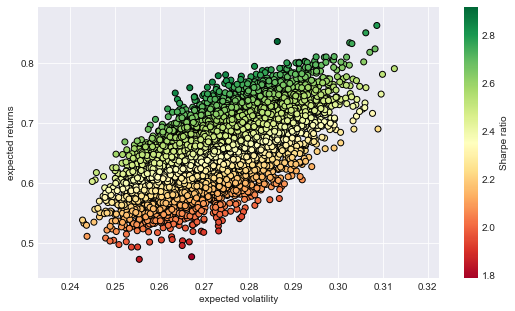

In [13]:
plt.style.use('seaborn-dark')
plt.figure(figsize=(9, 5))
plt.scatter(RandomPortfolios['Volatility'], RandomPortfolios['Returns'], c=RandomPortfolios['Returns']/RandomPortfolios['Volatility'], cmap='RdYlGn', edgecolors='black',marker='o') 
plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected returns')
plt.colorbar(label='Sharpe ratio')

<Figure size 576x432 with 0 Axes>

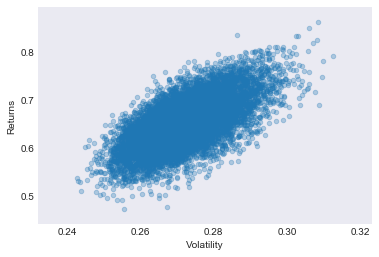

In [14]:
plt.figure(figsize=(8, 6))
RandomPortfolios.plot('Volatility', 'Returns', kind='scatter', alpha=0.3)
plt.show()

## 利用马科维茨投资组合选择理论，分别求出在允许卖空和不允许卖空两种情况下投资组合的有效前沿，并构建标准差最小的投资组合

In [15]:
def statistics(weights):        
    '''
    根据权重，计算资产组合收益率/波动率/夏普率。
    输入参数
    stock_returns : 收益率
    weights : array-like 权重数组
    权重为股票组合中不同股票的权重    
    返回值
    pret : float 投资组合收益率
    pvol : float 投资组合波动率
    pret / pvol : float
    夏普率，为组合收益率除以波动率，此处不涉及无风险收益率资产
    '''
    weights = np.array(weights)
    pret = np.sum(stock_returns.mean() * weights) * 252
    pvol = np.sqrt(np.dot(weights.T, np.dot(stock_returns.cov() * 252, weights)))
    return np.array([pret, pvol, pret / pvol])

def min_func_variance(weights):
    return statistics(weights)[1] ** 2

def min_func_port(weights):
    return statistics(weights)[1]

### 不允许卖空

In [16]:
#不允许卖空意味着权重只能限制在0到1范围内，不可以取负
bnds = tuple((0, 1) for x in range(length))
cons = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
#投资组合波动率的最小化
optv_no = sco.minimize(min_func_variance, length * [1. / length,], method='SLSQP', bounds=bnds, constraints=cons)

In [17]:
optv_no

     fun: 0.053974664382356485
     jac: array([0.1273084 , 0.10774565, 0.1078232 , 0.10812485, 0.10793126,
       0.11536816, 0.10792462, 0.10787634, 0.10760959, 0.10806089,
       0.11205743, 0.10825659, 0.10917574, 0.10783324, 0.10796889])
 message: 'Optimization terminated successfully.'
    nfev: 204
     nit: 12
    njev: 12
  status: 0
 success: True
       x: array([8.51016983e-18, 8.51812031e-02, 2.13684273e-02, 5.52054445e-02,
       1.01715408e-01, 0.00000000e+00, 1.69850161e-03, 2.57165354e-02,
       1.83184971e-01, 2.14500768e-01, 2.07050522e-18, 1.78348360e-01,
       0.00000000e+00, 3.67273669e-02, 9.63530143e-02])

In [18]:
print('不允许卖空的情况下{0}张股票的最优权重（标准差最小）配置为{1}'.format(length, list(optv_no['x'].round(4))))

不允许卖空的情况下15张股票的最优权重（标准差最小）配置为[0.0, 0.0852, 0.0214, 0.0552, 0.1017, 0.0, 0.0017, 0.0257, 0.1832, 0.2145, 0.0, 0.1783, 0.0, 0.0367, 0.0964]


In [19]:
statistics(optv_no['x']).round(4) #得到预期收益率、波动率和夏普指数

array([0.3918, 0.2323, 1.6864])

不允许卖空情况下标准差最小的投资组合可达到的预期收益率为39.18%，预期波动率为23.23%，得到的最优夏普指数为1.6864

In [20]:
#target_returns = np.linspace(0.2, 1, 81)
target_returns = np.linspace(0.2, 0.79,60) #设定目标收益率水平
target_volatilities = []

for tret in target_returns:
    cons = ({'type': 'eq', 'fun': lambda x:  statistics(x)[0] - tret},
            {'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})  #有效边界的两个绑定约束
    res = sco.minimize(min_func_port, length * [1. / length,], method='SLSQP',
                       bounds=bnds, constraints=cons)    #不同目标回报率的组合波动率优化
    target_volatilities.append(res['fun'])
    
target_volatilities = np.array(target_volatilities)
target_volatilities

array([0.29233868, 0.28243057, 0.27435215, 0.26737872, 0.26159766,
       0.25673584, 0.25247082, 0.24881672, 0.2456117 , 0.24280374,
       0.24037249, 0.23832863, 0.23668213, 0.23542379, 0.23444136,
       0.2336552 , 0.23306668, 0.23266687, 0.23242127, 0.23232507,
       0.23237772, 0.23257893, 0.23292678, 0.23340289, 0.23400051,
       0.23471872, 0.23555641, 0.23651231, 0.23758501, 0.23877459,
       0.24009968, 0.24158579, 0.24329386, 0.24522225, 0.24736777,
       0.24972236, 0.25228237, 0.25504023, 0.25799048, 0.26113055,
       0.26445679, 0.26796215, 0.27163892, 0.27548186, 0.27948378,
       0.28363797, 0.28793789, 0.29240468, 0.2970445 , 0.30184905,
       0.3068106 , 0.31192164, 0.31718061, 0.32272336, 0.32859779,
       0.33479892, 0.3413838 , 0.36008805, 0.42177589, 0.44029563])

不允许卖空情况下投资组合的有效前沿

Text(0, 0.5, 'expected return')

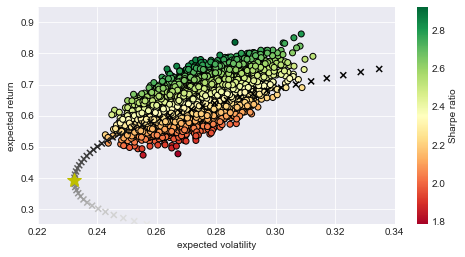

In [24]:
#画散点图
plt.figure(figsize=(8, 4))
#圆点为随机资产组合
plt.scatter(RandomPortfolios['Volatility'], RandomPortfolios['Returns'], c=RandomPortfolios['Returns']/RandomPortfolios['Volatility'],
            cmap='RdYlGn',edgecolors='black', marker='o')
plt.colorbar(label='Sharpe ratio')
#叉叉为有效边界            
plt.scatter(target_volatilities, target_returns,
            c=target_returns/target_volatilities, marker='x')
#红星为夏普率最大值的资产组合            
#plt.plot(statistics(optv_no['x'])[1], statistics(optv_no['x'])[0],'r*', markersize=15.0)
#黄星为最小方差的资产组合            
plt.plot(statistics(optv_no['x'])[1], statistics(optv_no['x'])[0],
         'y*', markersize=15.0)
            # minimum variance portfolio
plt.grid(True)
plt.xlim(0.22,0.34)
plt.ylim(0.25,0.95)
plt.xlabel('expected volatility')
plt.ylabel('expected return')

### 允许卖空

In [25]:
#允许卖空情况下，权重可以取负值
bnds1 = tuple((-1, 2) for x in range(length))
cons = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
#投资组合波动率的最小化
optv = sco.minimize(min_func_variance, length * [1. / length,], method='SLSQP', bounds=bnds1, constraints=cons)

In [26]:
print('允许卖空的情况下{0}张股票的最优权重（标准差最小）配置为{1}'.format(length, list(optv['x'].round(4))))

允许卖空的情况下15张股票的最优权重（标准差最小）配置为[-0.148, 0.1139, 0.0352, 0.0522, 0.1071, -0.0411, 0.0105, 0.0336, 0.292, 0.225, -0.0028, 0.1715, 0.0106, 0.0399, 0.1001]


In [27]:
statistics(optv['x']).round(4)

array([0.399 , 0.2288, 1.7434])

允许卖空情况下标准差最小的投资组合可达到的预期收益率为39.9%，预期波动率为22.88%，得到的最优夏普指数为1.7434

In [49]:
target_returns1 = np.linspace(0.2, 1, 81)
target_volatilities1 = []

for tret in target_returns1:
    cons = ({'type': 'eq', 'fun': lambda x:  statistics(x)[0] - tret},
            {'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})
    res = sco.minimize(min_func_port, length * [1. / length,], method='SLSQP',
                       bounds=bnds1, constraints=cons)
    target_volatilities1.append(res['fun'])
target_volatilities1 = np.array(target_volatilities1)
target_volatilities1

array([0.25117105, 0.24907111, 0.24706294, 0.2451488 , 0.2433309 ,
       0.24161207, 0.23999307, 0.23847664, 0.23706476, 0.23575931,
       0.23456206, 0.23347468, 0.23249872, 0.23163558, 0.23088652,
       0.23025266, 0.22973495, 0.22933418, 0.2290515 , 0.22888611,
       0.22883904, 0.22891039, 0.22910003, 0.22940766, 0.22983213,
       0.23037387, 0.23103159, 0.23180431, 0.23269088, 0.23369001,
       0.23480025, 0.23602002, 0.23734693, 0.2387805 , 0.24031821,
       0.2419581 , 0.24369809, 0.24553607, 0.24746985, 0.24949721,
       0.25161588, 0.25382358, 0.25611732, 0.25849605, 0.26095688,
       0.26349751, 0.26611565, 0.26880903, 0.27157543, 0.27441262,
       0.27731844, 0.28029076, 0.28332747, 0.28642654, 0.28958595,
       0.29280377, 0.29607808, 0.29940704, 0.30278815, 0.30622099,
       0.30970323, 0.31323321, 0.31680933, 0.32043007, 0.32409391,
       0.32779942, 0.33154521, 0.33532991, 0.33915225, 0.34301021,
       0.34690398, 0.35083172, 0.35479231, 0.35878466, 0.36280

允许卖空情况下投资组合的有效前沿

Text(0, 0.5, 'expected return')

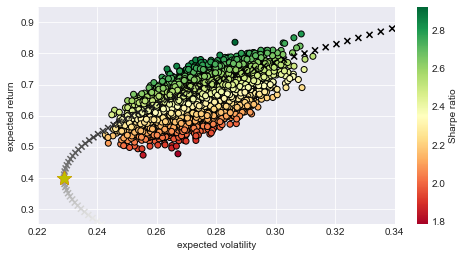

In [50]:
#画散点图
plt.figure(figsize=(8, 4))
#圆点为随机资产组合
plt.scatter(RandomPortfolios['Volatility'], RandomPortfolios['Returns'], c=RandomPortfolios['Returns']/RandomPortfolios['Volatility'],
            cmap='RdYlGn',edgecolors='black', marker='o')
plt.colorbar(label='Sharpe ratio')
#叉叉为有效边界            
plt.scatter(target_volatilities1, target_returns1,
            c=target_returns1/target_volatilities1, marker='x')
#红星为夏普率最大值的资产组合            
plt.plot(statistics(optv['x'])[1], statistics(optv['x'])[0],'r*', markersize=15.0)
#黄星为最小方差的资产组合            
plt.plot(statistics(optv['x'])[1], statistics(optv['x'])[0],'y*', markersize=15.0)
            # minimum variance portfolio
plt.grid(True)
plt.xlim(0.22,0.34)
plt.ylim(0.25,0.95)
plt.xlabel('expected volatility')
plt.ylabel('expected return')

## 寻找市场上一个无风险资产，利用资本资产定价模型，分别求出在允许卖空和不允许卖空两种情况下投资组合的有效前沿

### 不允许卖空

In [30]:
#寻找市场上无风险资产，91天期的国债利率为1.912%
risk_free = 0.019 #设定无风险利率
sharpe_ratio = (RandomPortfolios['Returns'] - risk_free) / RandomPortfolios['Volatility']

In [31]:
#使用有效边界中的投资组合
ind = np.argmin(target_volatilities)
ind

19

In [32]:
upper_half_volatilities = target_volatilities[ind:]
upper_half_returns = target_returns[ind:]

In [33]:
upper_half_volatilities

array([0.23232507, 0.23237772, 0.23257893, 0.23292678, 0.23340289,
       0.23400051, 0.23471872, 0.23555641, 0.23651231, 0.23758501,
       0.23877459, 0.24009968, 0.24158579, 0.24329386, 0.24522225,
       0.24736777, 0.24972236, 0.25228237, 0.25504023, 0.25799048,
       0.26113055, 0.26445679, 0.26796215, 0.27163892, 0.27548186,
       0.27948378, 0.28363797, 0.28793789, 0.29240468, 0.2970445 ,
       0.30184905, 0.3068106 , 0.31192164, 0.31718061, 0.32272336,
       0.32859779, 0.33479892, 0.3413838 , 0.36008805, 0.42177589,
       0.44029563])

In [34]:
upper_half_returns

array([0.39, 0.4 , 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49,
       0.5 , 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 ,
       0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7 , 0.71,
       0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79])

In [35]:
tck = sci.splrep(upper_half_volatilities, upper_half_returns,k=2)
#tck参数用于构造有效边界函数f(x)
def f(x):
    #有效边界函数 (样条函数逼近).
    return sci.splev(x, tck, der=0)

#同时也构造有效边界函数f(x)的一阶导数函数df(x)
def df(x):
    #有效边界函数f(x)的一阶导数函数 
    return sci.splev(x, tck, der=1)

def equations(p, risk_free_return=0.019):
    eq1 = risk_free_return - p[0]
    eq2 = risk_free_return + p[1] * p[2] - f(p[2])
    eq3 = p[1] - df(p[2])
    return eq1, eq2, eq3

In [36]:
tck

(array([0.23232507, 0.23232507, 0.23232507, 0.23247832, 0.23275286,
        0.23316484, 0.2337017 , 0.23435961, 0.23513756, 0.23603436,
        0.23704866, 0.2381798 , 0.23943714, 0.24084274, 0.24243983,
        0.24425805, 0.24629501, 0.24854506, 0.25100237, 0.2536613 ,
        0.25651535, 0.25956051, 0.26279367, 0.26620947, 0.26980053,
        0.27356039, 0.27748282, 0.28156087, 0.28578793, 0.29017129,
        0.29472459, 0.29944677, 0.30432983, 0.30936612, 0.31455112,
        0.31995198, 0.32566057, 0.33169835, 0.33809136, 0.35073592,
        0.39093197, 0.44029563, 0.44029563, 0.44029563]),
 array([0.39      , 0.40737171, 0.41007807, 0.42160462, 0.43071365,
        0.44070785, 0.45056563, 0.46049275, 0.47042973, 0.48038399,
        0.49040613, 0.50042704, 0.51053342, 0.52044912, 0.53039916,
        0.54034642, 0.55031309, 0.56027802, 0.57025213, 0.5802335 ,
        0.59021577, 0.60019632, 0.61017857, 0.6201657 , 0.6301517 ,
        0.64014009, 0.65012779, 0.66014383, 0.67014293, 0.

In [37]:
opt = sco.fsolve(equations, [0.01,0.5, 0.15])
opt

array([0.019     , 2.22644969, 0.29078339])

In [38]:
np.round(equations(opt))

array([ 0., -0., -0.])

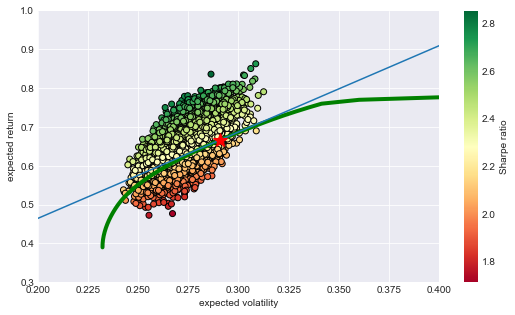

In [39]:
plt.figure(figsize=(9, 5))
#圆点为随机资产组合
plt.scatter(RandomPortfolios['Volatility'], RandomPortfolios['Returns'],c=sharpe_ratio, cmap='RdYlGn',edgecolors='black', marker='o')

#绿色线为有效边界
plt.plot(upper_half_volatilities, upper_half_returns, 'g', lw=4.0)

#设定资本市场线CML的x范围从0到0.6           
cml_x = np.linspace(0.2, 0.4)
#带入公式a+b*x求得y,作图
plt.plot(cml_x, opt[0] + opt[1] * cml_x, lw=1.5)
#标出资本市场线与有效边界的切点，红星处            
plt.plot(opt[2], f(opt[2]), 'r*', markersize=15.0) 
plt.grid(True)
#plt.axhline(0,color='k',ls='-',lw=2.0)
#plt.axvline(0,color='k',ls='-',lw=2.0)
plt.xlim(0.20,0.40)
plt.ylim(0.30,1.00)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')

In [40]:
cons = ({'type': 'eq', 'fun': lambda x:  statistics(x)[0] - f(opt[2])},
        {'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})
res = sco.minimize(min_func_port, length * [1. / length,], method='SLSQP',
                       bounds=bnds, constraints=cons)

In [41]:
res['x'].round(4)

array([0.    , 0.    , 0.209 , 0.2542, 0.    , 0.    , 0.    , 0.0341,
       0.    , 0.0818, 0.2477, 0.1117, 0.    , 0.    , 0.0615])

In [42]:
statistics(res['x']).round(4)

array([0.6664, 0.2908, 2.2918])

不允许卖空情况下标准差最小的投资组合可达到的预期收益率为66.64%，预期波动率为29.08%，得到的最优夏普指数为2.2918

### 允许卖空

In [43]:
ind1 = np.argmin(target_volatilities1)
ind1

20

In [51]:
upper_half_volatilities1 = target_volatilities1[ind1:]
upper_half_returns1 = target_returns1[ind1:]

In [52]:
upper_half_volatilities1

array([0.22883904, 0.22891039, 0.22910003, 0.22940766, 0.22983213,
       0.23037387, 0.23103159, 0.23180431, 0.23269088, 0.23369001,
       0.23480025, 0.23602002, 0.23734693, 0.2387805 , 0.24031821,
       0.2419581 , 0.24369809, 0.24553607, 0.24746985, 0.24949721,
       0.25161588, 0.25382358, 0.25611732, 0.25849605, 0.26095688,
       0.26349751, 0.26611565, 0.26880903, 0.27157543, 0.27441262,
       0.27731844, 0.28029076, 0.28332747, 0.28642654, 0.28958595,
       0.29280377, 0.29607808, 0.29940704, 0.30278815, 0.30622099,
       0.30970323, 0.31323321, 0.31680933, 0.32043007, 0.32409391,
       0.32779942, 0.33154521, 0.33532991, 0.33915225, 0.34301021,
       0.34690398, 0.35083172, 0.35479231, 0.35878466, 0.36280773,
       0.3668605 , 0.370942  , 0.3750513 , 0.3791875 , 0.38334898,
       0.3875363 ])

In [53]:
upper_half_returns1

array([0.4 , 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 ,
       0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61,
       0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72,
       0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83,
       0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94,
       0.95, 0.96, 0.97, 0.98, 0.99, 1.  ])

In [ ]:
tck1 = sci.splrep(upper_half_volatilities1, upper_half_returns1,k=2)

In [54]:
tck1 = sci.splrep(upper_half_volatilities1, upper_half_returns1,k=2)
#tck参数用于构造有效边界函数f(x)
def f(x):
    #有效边界函数 (样条函数逼近).
    return sci.splev(x, tck1, der=0)

#同时也构造有效边界函数f(x)的一阶导数函数df(x)
def df(x):
    #有效边界函数f(x)的一阶导数函数 
    return sci.splev(x, tck1, der=1)

def equations(p, risk_free_return=0.019):
    eq1 = risk_free_return - p[0]
    eq2 = risk_free_return + p[1] * p[2] - f(p[2])
    eq3 = p[1] - df(p[2])
    return eq1, eq2, eq3

In [55]:
tck1

(array([0.22883904, 0.22883904, 0.22883904, 0.22900521, 0.22925385,
        0.2296199 , 0.230103  , 0.23070273, 0.23141795, 0.23224759,
        0.23319044, 0.23424513, 0.23541014, 0.23668348, 0.23806371,
        0.23954935, 0.24113815, 0.24282809, 0.24461708, 0.24650296,
        0.24848353, 0.25055654, 0.25271973, 0.25497045, 0.25730669,
        0.25972647, 0.2622272 , 0.26480658, 0.26746234, 0.27019223,
        0.27299402, 0.27586553, 0.2788046 , 0.28180911, 0.284877  ,
        0.28800624, 0.29119486, 0.29444093, 0.29774256, 0.3010976 ,
        0.30450457, 0.30796211, 0.31146822, 0.31502127, 0.3186197 ,
        0.32226199, 0.32594667, 0.32967231, 0.33343756, 0.33724108,
        0.34108123, 0.34495709, 0.34886785, 0.35281202, 0.35678849,
        0.36079619, 0.36483411, 0.36890125, 0.37299665, 0.3771194 ,
        0.38126824, 0.3875363 , 0.3875363 , 0.3875363 ]),
 array([0.4       , 0.41407275, 0.42097154, 0.43135672, 0.44084644,
        0.45072742, 0.4605957 , 0.47051198, 0.48044545, 0.

In [56]:
opt1 = sco.fsolve(equations, [0.01, 0.50, 0.15])
opt1

array([0.019     , 2.53968418, 0.35001892])

In [57]:
np.round(equations(opt1))

array([ 0., -0.,  0.])

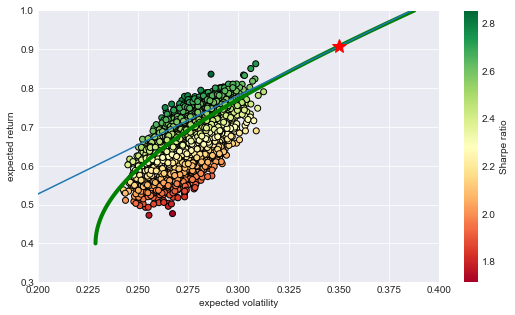

In [58]:
plt.figure(figsize=(9, 5))
#圆点为随机资产组合
plt.scatter(RandomPortfolios['Volatility'], RandomPortfolios['Returns'], c=sharpe_ratio, cmap='RdYlGn',edgecolors='black', marker='o')

#绿色线为有效边界
plt.plot(upper_half_volatilities1, upper_half_returns1, 'g', lw=4.0)

#设定资本市场线CML的x范围从0到0.6           
cml_x = np.linspace(0.2, 0.4)
#带入公式a+b*x求得y,作图
plt.plot(cml_x, opt1[0] + opt1[1] * cml_x, lw=1.5)
#标出资本市场线与有效边界的切点，红星处            
plt.plot(opt1[2], f(opt1[2]), 'r*', markersize=15.0) 
plt.grid(True)
#plt.axhline(0,color='k',ls='-',lw=2.0)
#plt.axvline(0,color='k',ls='-',lw=2.0)
plt.xlim(0.20,0.40)
plt.ylim(0.30,1.00)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')

In [59]:
cons = ({'type': 'eq', 'fun': lambda x:  statistics(x)[0] - f(opt1[2])},
        {'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})
res = sco.minimize(min_func_port, length * [1. / length,], method='SLSQP',
                       bounds=bnds1, constraints=cons)

In [60]:
res['x'].round(4)

array([-0.3553, -0.2762,  0.2532,  0.3528, -0.3005,  0.0442,  0.0296,
        0.0495,  0.4373,  0.2661,  0.3482,  0.1484, -0.0524, -0.0108,
        0.0658])

In [61]:
statistics(res['x']).round(4)

array([0.9079, 0.35  , 2.594 ])

允许卖空情况下标准差最小的投资组合可达到的预期收益率为90.79%，预期波动率为35%，得到的最优夏普指数为2.594